In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
%matplotlib inline

df = pd.read_csv('creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [1]:

X = df.copy()
# X = X.dropna()
# Modify dataset

y = X[['Class']].copy()
X = X.drop('Class', axis=1)
X = np.array(X)
y = np.array(y)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

print(sss)   

StratifiedShuffleSplit(n_splits=1, random_state=0)
for train_index, test_index in sss.split(X, y):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


target = df['Class'].value_counts()
print(target)
print('baseline =', 100 - (target[1] / target[0] * 100), '%' )

y_train = np.ravel(y_train)
y_teat = np.ravel(y_test)

NameError: name 'df' is not defined

In [16]:
log_Model = linear_model.LogisticRegression(penalty='l1', solver='liblinear')
Fraud_model = log_Model.fit(X_train, y_train)

print('Simple Logistic Model')
print(log_Model.score(X_train, y_train))
print(log_Model.score(X_test, y_test))

#grd_boost_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
grd_boost_tree = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=0, subsample=0.5)
Fraud_model2 = grd_boost_tree.fit(X_train, y_train)
Fraud_model2 = grd_boost_tree.fit(X_train, y_train)
print('')
print('Gradient Boosted Trees')
print(grd_boost_tree.score(X_train, y_train))
print(grd_boost_tree.score(X_test, y_test))


Simple Logistic Model
0.9992187671443306
0.9991924440855307

Gradient Boosted Trees
0.9991924334525665
0.9991222218320986


In [17]:
from sklearn import metrics
# Simple Logistics
y_predict = Fraud_model.predict(X_test)
fraud_cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print('Simple Logistic')
print(fraud_cnf_matrix)
# Gradient Boosted Trees
y_predict_2 = Fraud_model2.predict(X_test)
fraud_cnf_matrix_2 = metrics.confusion_matrix(y_test, y_predict_2)
print('')
print('Gradient Boosted Trees')
print(fraud_cnf_matrix_2)

Simple Logistic
[[56853    11]
 [   35    63]]

Gradient Boosted Trees
[[56848    16]
 [   34    64]]


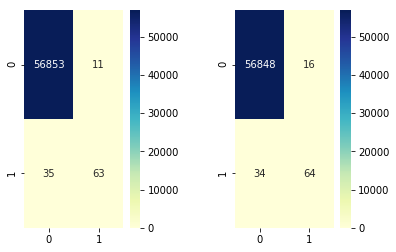

In [18]:
class_names=[0,1] # name  of classes
fig, axs = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


plt.subplot(121)
sns.heatmap(pd.DataFrame(fraud_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

# Initialize second subplot
plt.subplot(122)
sns.heatmap(pd.DataFrame(fraud_cnf_matrix_2), annot=True, cmap="YlGnBu" ,fmt='g')

plt.subplots_adjust(wspace = 0.7, top = None)
# Show the plot                   
plt.show()

In [19]:
print('Simple Logistic')
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))
print('')
print('Gradient Boosted Trees')
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_2))
print("Precision:",metrics.precision_score(y_test, y_predict_2))
print("Recall:",metrics.recall_score(y_test, y_predict_2))

Simple Logistic
Accuracy: 0.9991924440855307
Precision: 0.8513513513513513
Recall: 0.6428571428571429

Gradient Boosted Trees
Accuracy: 0.9991222218320986
Precision: 0.8
Recall: 0.6530612244897959


Simple Logistic


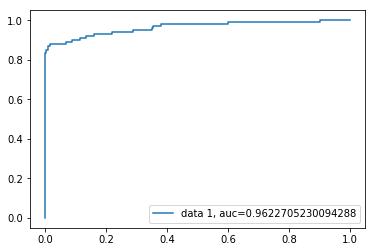

In [7]:
y_pred_proba = Fraud_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
print('Simple Logistic')
plt.show()
